In [ ]:
# INSTALL EXTRA PACKAGES
!pip install transformers

# Kaggle notebook

This notebook has been executed on Kaggle because of the long time required. The dataset has been uploaded on our personal Kaggle accounts.

In [ ]:
# IMPORTS
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2Model
import os
import numpy as np
#from google.colab import drive

#drive.mount("/content/drive")



import pandas as pd
from sklearn.model_selection import train_test_split


# Data loading

GPT takes Dataframes as input, and it's based on reading each file one by one.

The number of samples loaded is written to confirm the correct loading.

We use test_train_split from SKLearn to separate the test set.

In [ ]:
# LOADING THE DATASET
def load_data(root_dir):
    data = {"review": [], "target": []}

    for dir_name in os.listdir(root_dir):
        dir_path = os.path.join(root_dir, dir_name)
        if os.path.isdir(dir_path):
            label = 0 if dir_name == "bot" else 1
            for file_name in os.listdir(dir_path):
                file_path = os.path.join(dir_path, file_name)
                if os.path.isfile(file_path) and file_name.endswith(".txt"):
                    with open(file_path, "r", encoding="utf-8") as file:
                        content = file.read()
                        data["review"].append(content)
                        data["target"].append(label)

    return pd.DataFrame(data)
base_path="/kaggle/input/reviews"
root_dir = os.path.join(base_path, "dataset")
df = load_data(root_dir)
# Splitting dei dati in set di addestramento e di test
X = df["review"]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("Numero di esempi di addestramento:", len(X_train))
print("Numero di esempi di test:", len(X_test))

Numero di esempi di addestramento: 16248
Numero di esempi di test: 4063


In [ ]:
# SHOW EXAMPLE
print(df.head())
print(X_train.head())
print(y_train.head())

                                              review  target
0  In a world where magic exists and mythical cre...       0
1  "Whispering Rainbow" is a film that promises a...       0
2  Shattered Echoes of the Forgotten Skies is a m...       0
3  The Great Gatsby is a visually stunning movie ...       0
4  "Nebula's Adventures" is a visually stunning f...       0
4538     "The Mystic's Secret" is a mesmerizing tale of...
18184    Like Tarzan the Ape Man (1932), only more so. ...
2388     Galactic Reflections is a sci-fi movie that ha...
1263     Mystic Legends is a movie that tries to take i...
6082     "How to Train Your Dragon" is an amazing movie...
Name: review, dtype: object
4538     0
18184    1
2388     0
1263     0
6082     0
Name: target, dtype: int64


# Preprocessing

GPT is based on tokenization, which also requires to make special characters for padding and end of sentence.

In [ ]:
# TOKENIZER
MAX_LENGTH = math.ceil((X_train.apply(lambda x: len(str(x).split())).mean()))+2
print(MAX_LENGTH)

PAD_TOKEN = "<|pad|>"
EOS_TOKEN = "<|endoftext|>"

# this will download and initialize the pre trained tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2",
    pad_token=PAD_TOKEN,
    eos_token=EOS_TOKEN,
    max_length=MAX_LENGTH,
    is_split_into_words=True)

# TENSORS ALLOCATION
X_train = [str(ex) + EOS_TOKEN for ex in X_train]
X_test = [str(ex) + EOS_TOKEN for ex in X_test]

X_train_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)['input_ids'] for x in X_train]
X_test_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)['input_ids'] for x in X_test]

X_train_in = tf.squeeze(tf.convert_to_tensor(X_train_), axis=1)
X_test_in = tf.squeeze(tf.convert_to_tensor(X_test_), axis=1)

264


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


# Example of tensor

We have found no way to have a human-readable tensor that is fed to the tokenizer

In [ ]:
X_train_in[0]

<tf.Tensor: shape=(264,), dtype=int32, numpy=
array([    1,   464, 22936,   338,  3943,     1,   318,   257, 46814,
        2890, 12838,   286,  4240,   290,  5536,   326,   481,  2666,
         345,  4822,  7784,   422,  3726,   284,   886,    13,  5345,
         287,   257,   995,   810, 29746,  5635,  2152,  7848,   262,
        8850,    11,   428,  2646, 25409,   262, 40582,  3160,   286,
         257,  1448,   286,  3925,   508,  8588, 11359,  7883,    13,
         198,   198,   464,  1621,  5679,  4422,    11,   257,  1862,
        2415,   508, 27472,   673,   468, 19552,   262,  6979,   286,
         537,   958, 40024,   590,   422,   607, 18410,    11,   257,
        3665, 37311,    13,  1081,  4422, 22974,   284, 19356,   607,
       40000,  5635,    11,   673,   555,  1073,   690,   257,  7104,
         995,   286, 13141,   290, 38520,   326, 20201,   284, 11626,
         607,  5475,    13,   198,   198,   464,  2646,   318, 21104,
        2823,    11,   351, 13393, 27329,   

In [ ]:
# TOKENIZATION IS DONE HERE
X_train_mask_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)["attention_mask"] for x in X_train]
X_test_mask_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)["attention_mask"] for x in X_test]

X_train_mask = tf.squeeze(tf.convert_to_tensor(X_train_mask_), axis=1)
X_test_mask = tf.squeeze(tf.convert_to_tensor(X_test_mask_), axis=1)

# Pre-trained Model

The pre-trained model is used with locked weights. We add to that only a classifier that has to output only two possible labels.

In [ ]:
# PRE TRAINED MODEL
model = TFGPT2Model.from_pretrained("gpt2", use_cache=False,
        pad_token_id=tokenizer.pad_token_id,
        eos_token_id=tokenizer.eos_token_id)
model.training = True
model.resize_token_embeddings(len(tokenizer))


for layer in model.layers:
    layer.trainable = False


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [ ]:
# ADDING A CLASSIFICATION LAYER
input = tf.keras.layers.Input(shape=(None,), dtype='int32')
mask = tf.keras.layers.Input(shape=(None,), dtype='int32')
x = model(input, attention_mask=mask)
x = tf.reduce_mean(x.last_hidden_state, axis=1)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
# MODEL ALLOCATION
clf = tf.keras.Model([input, mask], output)

In [ ]:
# METRICS
base_learning_rate = 0.0005
optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate)
loss=tf.keras.losses.BinaryCrossentropy()

clf.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


# Model summary

In [ ]:
clf.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 tfgpt2_model (TFGPT2Model)  TFBaseModelOutputWithPastA   1244405   ['input_1[0][0]',             
                             ndCrossAttentions(last_hid   76         'input_2[0][0]']             
                             den_state=(None, None, 768                                           
                             ),                                                             

In [ ]:
# SETTING AN EARLY STOP ON PATIENCE
callbacks = tf.keras.callbacks.EarlyStopping(
        monitor="accuracy", verbose=1, patience=3, restore_best_weights=True)

In [ ]:
# LABELING
# 0 : written by bot
# 1 : written by human
def map_labels(value):
  if value == 0:
    return 0
  if value == 1:
    return 1


y_train_ = y_train.map(map_labels)
y_test_ = y_test.map(map_labels)

In [ ]:
# TENSORS FOR LABELS
y_train_in = tf.constant(y_train_, dtype=tf.int32)
y_test_in = tf.constant(y_test_, dtype=tf.int32)


tf.config.experimental_run_functions_eagerly(True)


# Training the classifier

In [ ]:
# TRAINING THE CLASSIFIER
history = clf.fit([X_train_in, X_train_mask], y_train_in, epochs=3, batch_size=5, validation_split=0.2, callbacks=callbacks)

Epoch 1/3
2600/2600 [==============================] - 1423s 546ms/step - loss: 0.1742 - accuracy: 0.9525 - val_loss: 0.0621 - val_accuracy: 0.9843
Epoch 2/3
2600/2600 [==============================] - 1403s 540ms/step - loss: 0.0332 - accuracy: 0.9926 - val_loss: 0.0630 - val_accuracy: 0.9791
Epoch 3/3
2600/2600 [==============================] - 1384s 532ms/step - loss: 0.0208 - accuracy: 0.9951 - val_loss: 0.0395 - val_accuracy: 0.9883


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


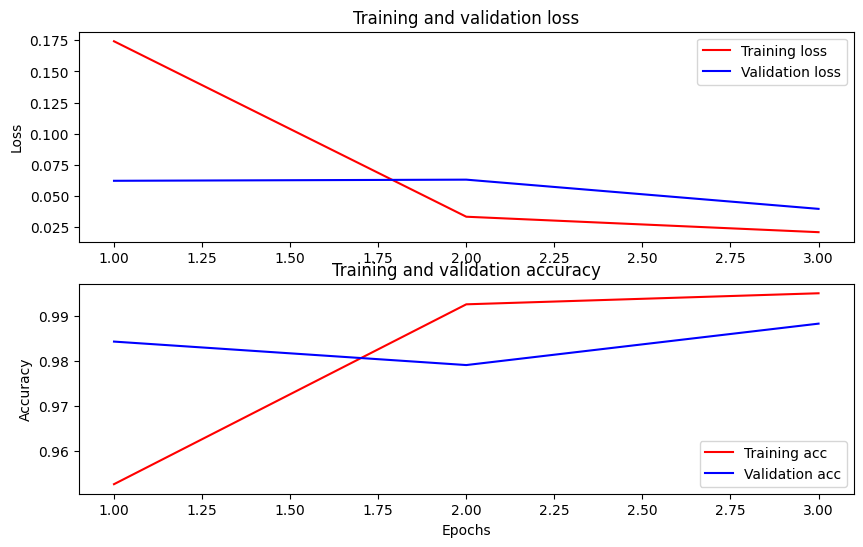

In [ ]:
#PLOT MODEL PERFOMANCE

history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Testing phase

In [ ]:
# EVALUATION
clf.evaluate([X_test_in, X_test_mask], y_test_in)

clf.training = False
y_pred = clf.predict([X_test_in, X_test_mask])

127/127 [==============================] - 47s 374ms/step
